**Data Description**

**Earliest_cr_line** :The month the borrower's earliest reported credit line was opened

**Emp_title** :The job title supplied by the Borrower when applying for the loan.

**Fico_range_high** :The upper boundary range the borrower’s FICO at loan origination belongs to.

**Fico_range_low** :The lower boundary range the borrower’s FICO at loan origination belongs to.

**Grade** :LC assigned loan grade

**Application_type** :Indicates whether the loan is an individual application or a joint application with two co-borrowers.

**Initial_list_status** :The initial listing status of the loan. Possible values are – W, F

**Num_actv_bc_tl** :Number of currently active bankcard accounts.

**Mort_acc** :Number of mortgage accounts.

**Tot_cur_bal** :Total current balance of all accounts.

**Open_acc** :The number of open credit lines in the borrower's credit file.

**Pub_rec** :Number of derogatory public records.

**pub_rec_bankruptcies** :Number of public record bankruptcies.

**Purpose** :A category provided by the borrower for the loan request.

**revol_bal** :Total credit revolving balance

**Title** :The loan title provided by the borrower

**total_acc** :The total number of credit lines currently in the borrower's credit file.

**verification_status** :Indicates if income was verified by LC, not verified, or if the income source was verified.

**addr_state** :The state provided by the borrower in the loan application.

**annual_inc** :The self-reported annual income provided by the borrower during registration.

**emp_length** :Employment length in years. Possible values are between 0 and 10 where
0 means less than one year and 10 means ten or more years.

**home_ownership** :The home ownership status provided by the borrower during registration.
Our values are: RENT, OWN, MORTGAGE, OTHER.

**int_rate** :Interest Rate on the loan

**loan_amnt** :The listed amount of the loan applied for by the borrower. If at some point
in time, the credit department reduces the loan amount, then it will be reflected in this value.

**sub_grade** :LC assigned loan subgrade.

**Term** :The number of payments on the loan. Values are in months and can be either 36 or 60.

**revol_util** :Revolving line utilization rate, or the amount of credit the borrower is
using relative to all available revolving credit.

**Target**

**loan_status** :Status of the loan.

## 1) Import Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# changing the directory
import os
os.chdir("C:/Users/HP/OneDrive/Desktop/Machine Learning/hackthon project")

In [3]:
# importing the dataset
df = pd.read_csv("train_loan_data (1).csv")

In [4]:
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


# Data Preparation
###### 1.1) Understanding the data
###### 1.2) Descriptive Statistics
###### 1.3) Missing value Treatment
###### 1.4) Outlier Treatment 
###### 1.5) EXPLORATORY DATA ANALYSIS
###### 1.6) Encoding and Feature Scaling
###### 1.7) Splitting the data into Train and Test
###### 1.8) Applying Machine Learning Algorithums

#### 1.1) Understanding Data

In [5]:
# first five rows of the dataset
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [6]:
#length of the dataframe
len(df)

80000

In [7]:
# shape of the dataframe
df.shape

(80000, 28)

In [8]:
# No. of columns in dataframe
df.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [9]:
# Count of total no. of columns
len(df.columns)

28

In [10]:
#No. of duplicate values
df.duplicated().sum()

0

### 1.2) Descriptive Statistics

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [12]:
## Statistic analysis
df.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


#### **Outliers are present in the datase**

In [13]:
# object columns
df.describe(include= "O")

,addr_state,earliest_cr_line,emp_length,emp_title,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,title,verification_status,loan_status
count,80000,80000,75412,74982,80000,80000,80000,80000,80000,80000,80000,79030,80000,80000
unique,51,640,11,36661,7,6,2,2,14,35,2,5348,3,2
top,CA,Sep-03,10+ years,Teacher,B,MORTGAGE,Individual,w,debt_consolidation,C1,36 months,Debt consolidation,Source Verified,Paid
freq,11744,547,26278,1278,23502,39628,78446,46745,46418,4982,60750,39396,30855,64030


## 1.3) Missing Vlaue 

In [14]:
# missing values
df.isnull().sum()/len(df)*100

addr_state              0.00000
annual_inc              0.00000
earliest_cr_line        0.00000
emp_length              5.73500
emp_title               6.27250
fico_range_high         0.00000
fico_range_low          0.00000
grade                   0.00000
home_ownership          0.00000
application_type        0.00000
initial_list_status     0.00000
int_rate                0.00000
loan_amnt               0.00000
num_actv_bc_tl          4.93500
mort_acc                3.46375
tot_cur_bal             4.93500
open_acc                0.00000
pub_rec                 0.00000
pub_rec_bankruptcies    0.03875
purpose                 0.00000
revol_bal               0.00000
revol_util              0.06625
sub_grade               0.00000
term                    0.00000
title                   1.21250
total_acc               0.00000
verification_status     0.00000
loan_status             0.00000
dtype: float64

###### **There is some missing values in few columns**

In [15]:
## dropping missing values 
df.dropna(inplace = True)

In [16]:
## checking if there any missing value in dataset
df.isnull().sum()/len(df)*100

addr_state              0.0
annual_inc              0.0
earliest_cr_line        0.0
emp_length              0.0
emp_title               0.0
fico_range_high         0.0
fico_range_low          0.0
grade                   0.0
home_ownership          0.0
application_type        0.0
initial_list_status     0.0
int_rate                0.0
loan_amnt               0.0
num_actv_bc_tl          0.0
mort_acc                0.0
tot_cur_bal             0.0
open_acc                0.0
pub_rec                 0.0
pub_rec_bankruptcies    0.0
purpose                 0.0
revol_bal               0.0
revol_util              0.0
sub_grade               0.0
term                    0.0
title                   0.0
total_acc               0.0
verification_status     0.0
loan_status             0.0
dtype: float64

## 1.4) Outliers Treatment

In [17]:
# outliers treatment
def outliers_treatment(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    df_rem_out = data[~((data<(Q1-1.5*IQR))| (data>(Q3+1.5*IQR))).any(axis=1)]
    return df_rem_out

df = outliers_treatment(df)

C:\Users\HP\AppData\Local\Temp\ipykernel_4336\3635823943.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\HP\AppData\Local\Temp\ipykernel_4336\3635823943.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
C:\Users\HP\AppData\Local\Temp\ipykernel_4336\3635823943.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_rem_out = data[~((data<(Q1-1.5*IQR))| (data>(Q3+1.5*IQR))).any(axis=1)]


In [18]:
len(df)

46136

In [19]:
## Checking correlation
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_4336\201031404.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
annual_inc,1.000000,0.076138,0.076138,-0.120126,0.448604,0.118849,0.306792,0.437787,0.175316,NaN,NaN,0.345704,0.047904,0.278300
fico_range_high,0.076138,1.000000,1.000000,-0.381225,0.094148,-0.115847,0.091128,0.104232,0.034885,NaN,NaN,0.002816,-0.431674,0.041335
fico_range_low,0.076138,1.000000,1.000000,-0.381225,0.094148,-0.115847,0.091128,0.104232,0.034885,NaN,NaN,0.002816,-0.431674,0.041335
int_rate,-0.120126,-0.381225,-0.381225,1.000000,0.139311,0.019359,-0.074138,-0.076917,-0.024047,NaN,NaN,-0.015603,0.235148,-0.059475
loan_amnt,0.448604,0.094148,0.094148,0.139311,1.000000,0.164707,0.210545,0.247216,0.150301,NaN,NaN,0.451096,0.102924,0.202256
num_actv_bc_tl,0.118849,-0.115847,-0.115847,0.019359,0.164707,1.000000,0.002093,0.042348,0.468595,NaN,NaN,0.437337,0.072135,0.213667
mort_acc,0.306792,0.091128,0.091128,-0.074138,0.210545,0.002093,1.000000,0.582230,0.099931,NaN,NaN,0.231677,0.029855,0.355969
tot_cur_bal,0.437787,0.104232,0.104232,-0.076917,0.247216,0.042348,0.582230,1.000000,0.239879,NaN,NaN,0.289976,0.063761,0.344511
open_acc,0.175316,0.034885,0.034885,-0.024047,0.150301,0.468595,0.099931,0.239879,1.000000,NaN,NaN,0.301789,-0.187584,0.665242
pub_rec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\HP\AppData\Local\Temp\ipykernel_4336\2100696948.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

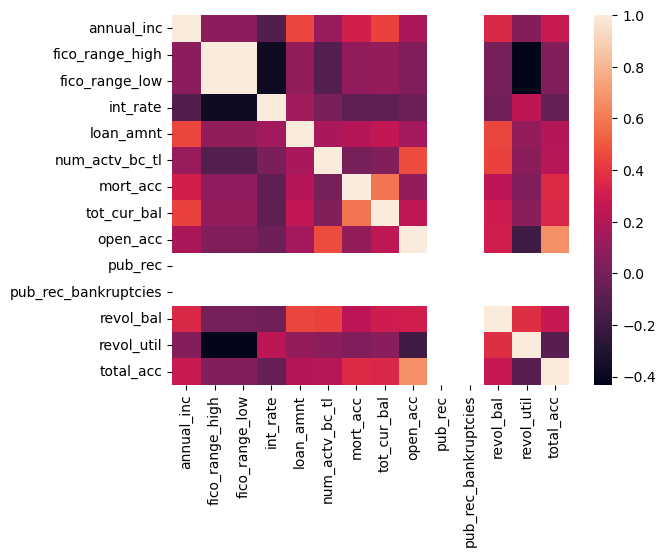

In [20]:
# Plotting heatmap
sns.heatmap(df.corr())

In [21]:
## Dropping column
df.drop("fico_range_low",axis = 1, inplace = True)

In [22]:
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,grade,home_ownership,application_type,initial_list_status,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,E,MORTGAGE,Individual,w,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,B,RENT,Individual,w,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,B,MORTGAGE,Individual,w,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,B,MORTGAGE,Individual,w,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
6,NY,100000.0,Oct-86,10+ years,RN,699,C,MORTGAGE,Individual,f,...,0.0,credit_card,32488,54.1,C1,36 months,Credit card refinancing,36,Verified,Paid


## 1.5) EXPLORATORY DATA ANALYSIS

<Figure size 1500x200 with 0 Axes>

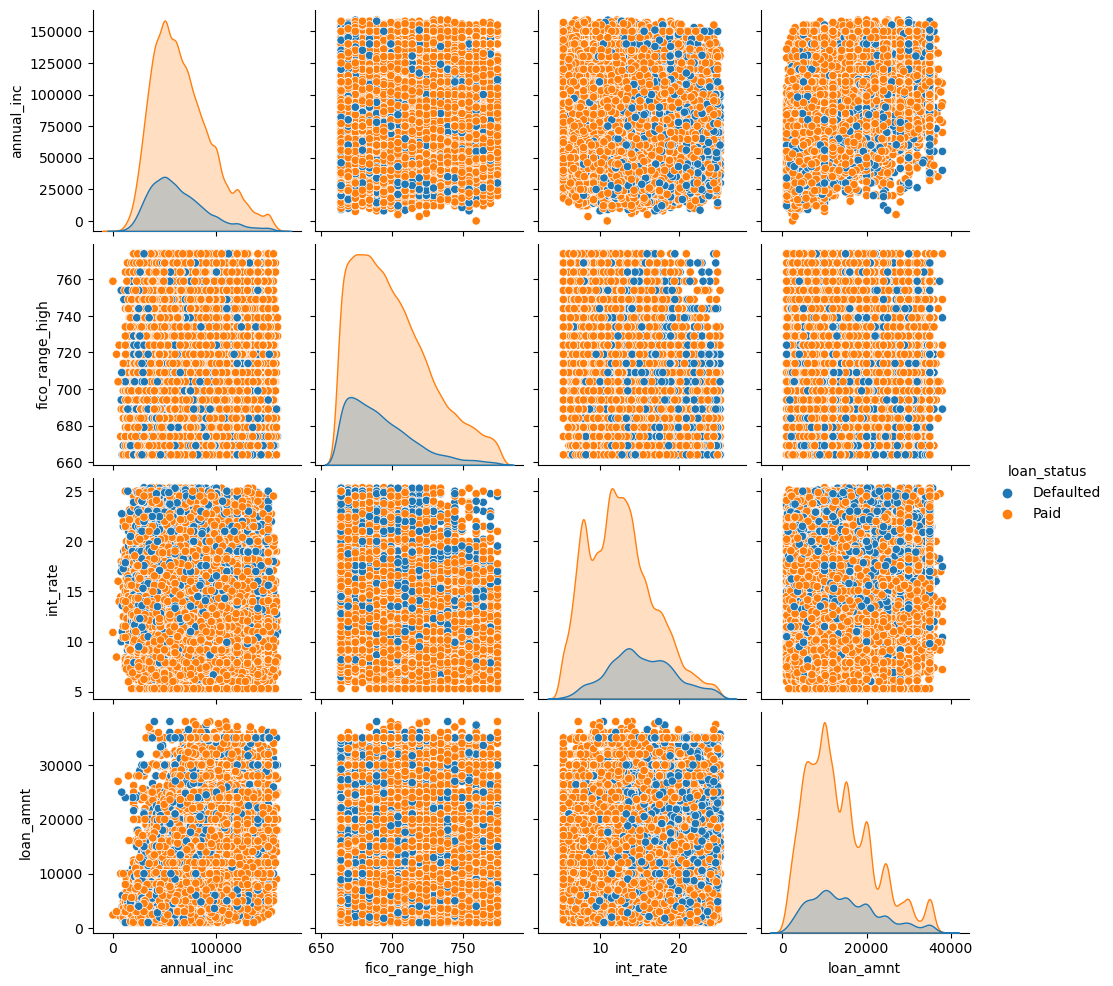

In [23]:
## plotting pair plot
plt.figure(figsize=(15,2))
sns.pairplot(df[["annual_inc","fico_range_high","int_rate","loan_amnt","loan_status"]], hue="loan_status")
plt.show()

###### **From the above chart there is no significant outcome which can tell us that the numerical features.**

<Figure size 1500x200 with 0 Axes>

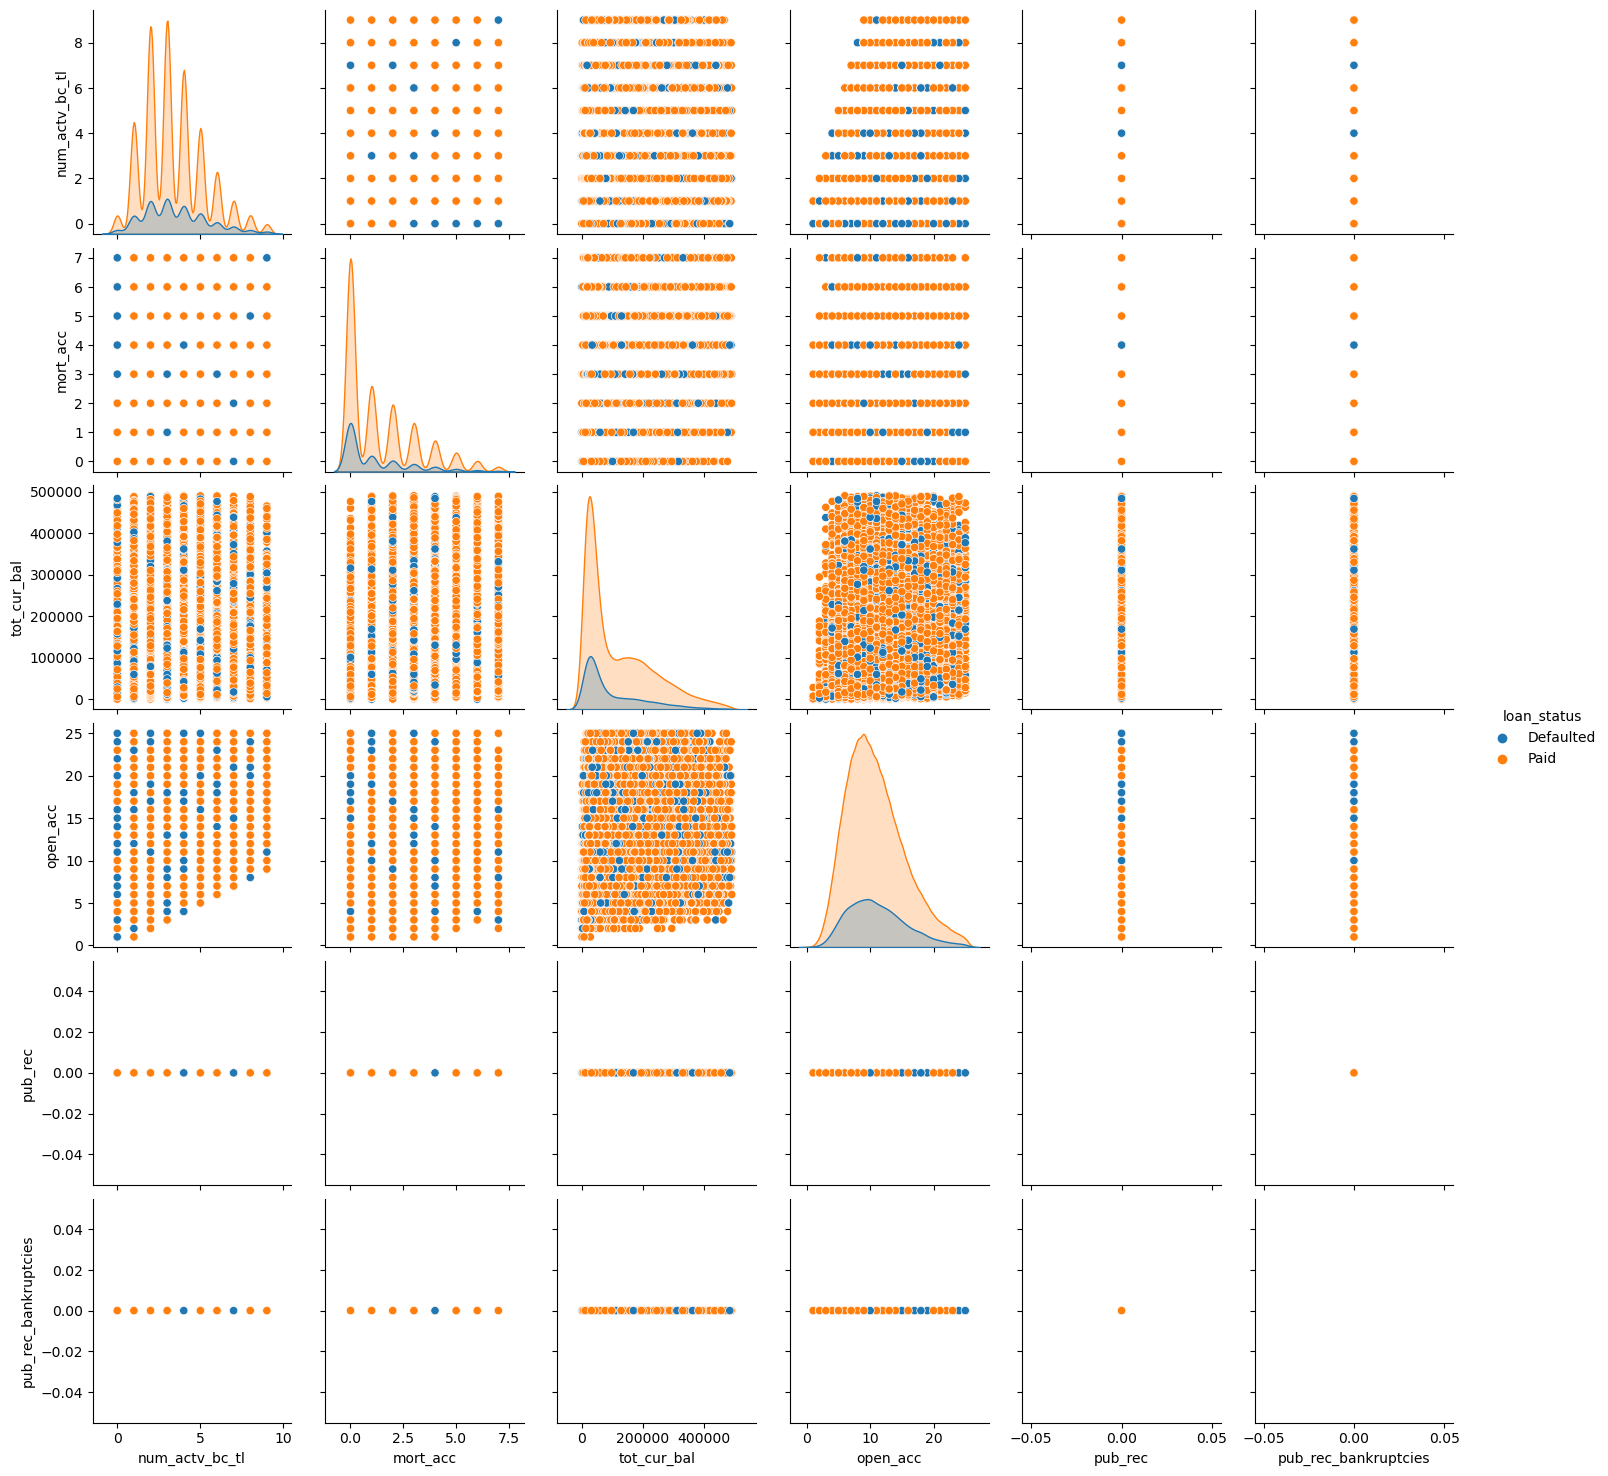

In [24]:
## plotting pair plot
plt.figure(figsize=(15,2))
sns.pairplot(df[["num_actv_bc_tl","mort_acc","tot_cur_bal","open_acc","pub_rec","pub_rec_bankruptcies","loan_status"]], hue="loan_status")
plt.show()

###### **From the above chart there is no significant outcome which can tell us that the numerical features.**

<Figure size 1500x200 with 0 Axes>

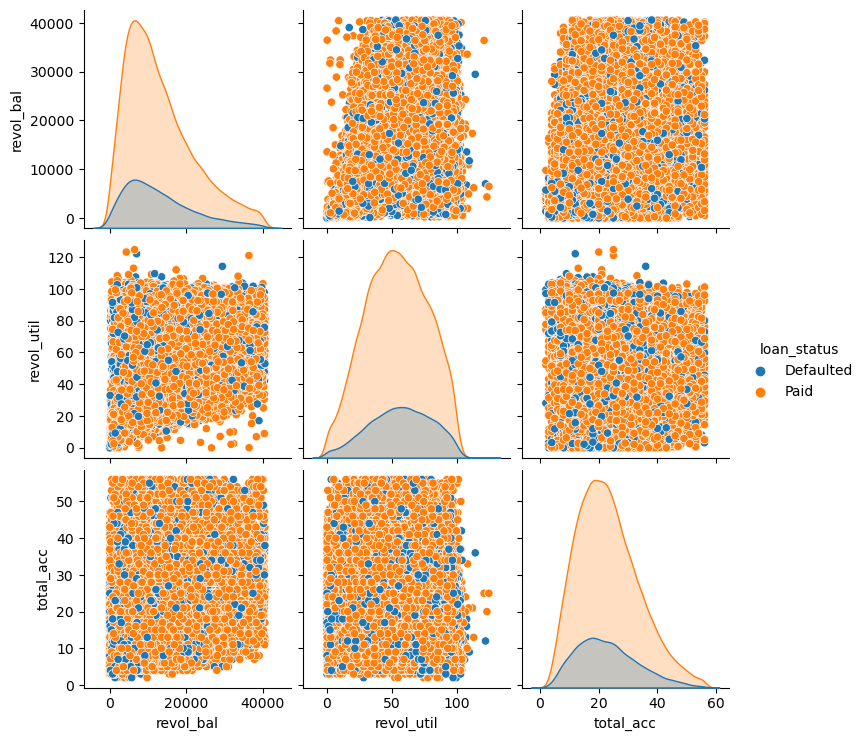

In [25]:
## plotting pair plot
plt.figure(figsize=(15,2))
sns.pairplot(df[["revol_bal","revol_util","total_acc","loan_status"]], hue="loan_status")
plt.show()

###### **From the above chart there is no significant outcome which can tell us that the numerical features.**

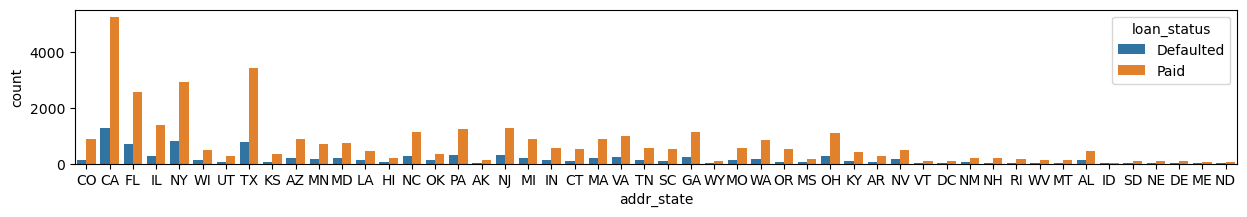

In [26]:
plt.figure(figsize=(15,2))
sns.countplot(df, x= "addr_state", hue = "loan_status")
plt.show()

#### **There is no significant insights coming from the addr_state**

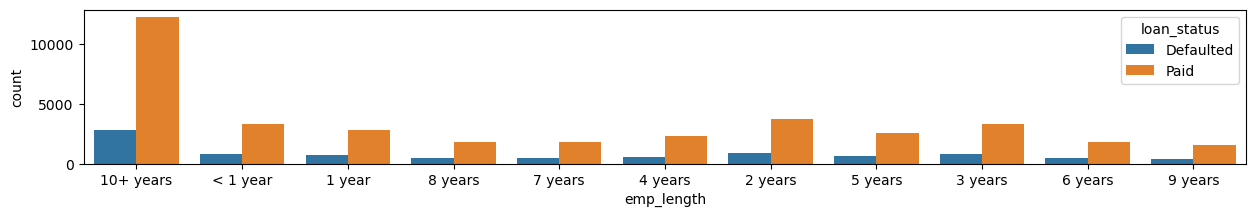

In [27]:
plt.figure(figsize=(15,2))
sns.countplot(df, x= "emp_length", hue = "loan_status")
plt.show()

#### **People who have more than 10 years of employement length has paid their loan.**

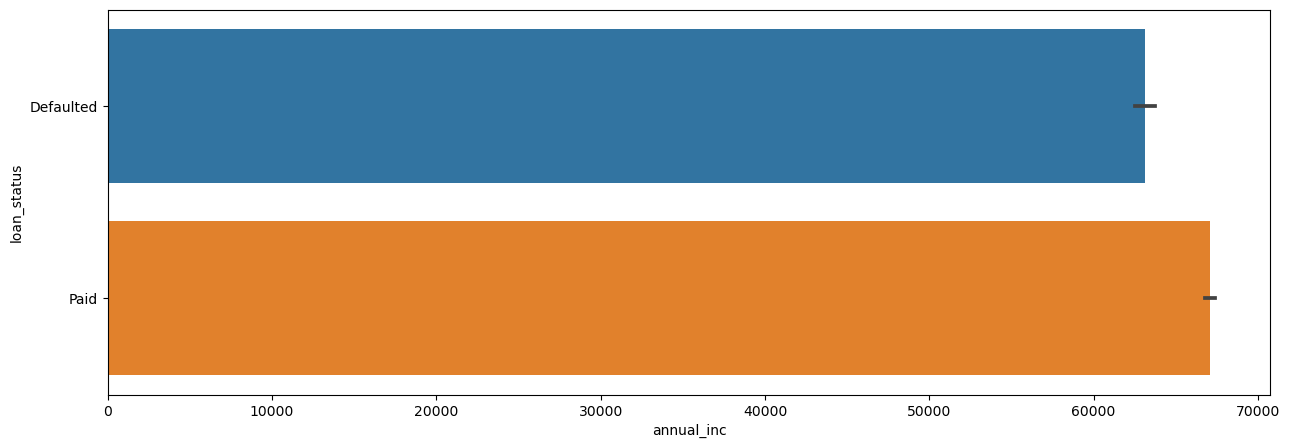

In [28]:
## annual_inc vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="annual_inc",y="loan_status")
plt.show()

##### **People with more annual income have paid the loan**

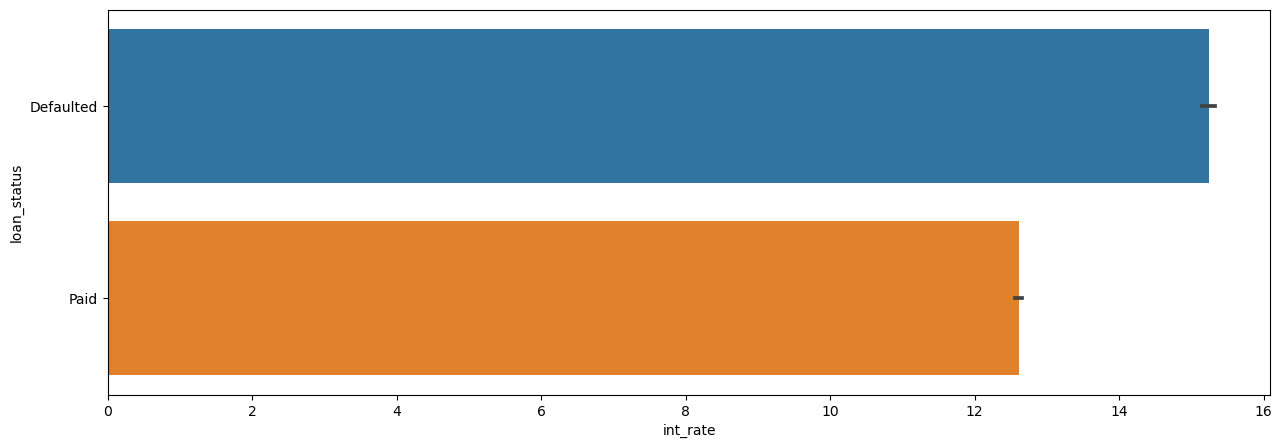

In [29]:
# int_rate vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="int_rate",y="loan_status")
plt.show()

##### **People who have taken loan on high interest rate have not paid the loan.**  

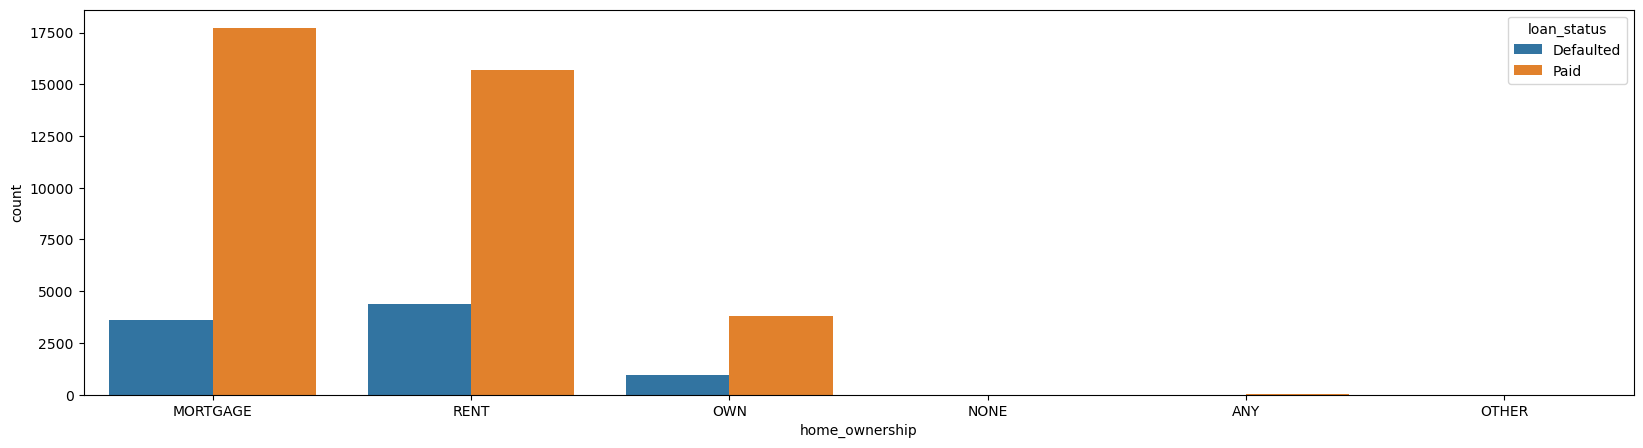

In [30]:
# countplot of home_ownership
plt.figure(figsize=(20,5))
sns.countplot(data=df,x="home_ownership",hue="loan_status")
plt.show()

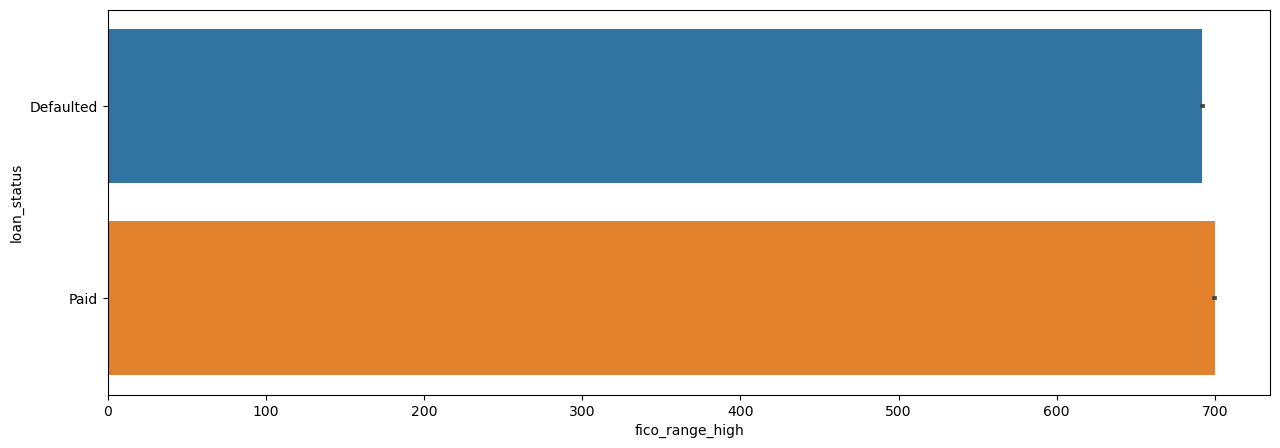

In [31]:
# fico_range_high vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="fico_range_high",y="loan_status")
plt.show()

In [32]:
#### **There is no significant insights coming from the fico_range_high**

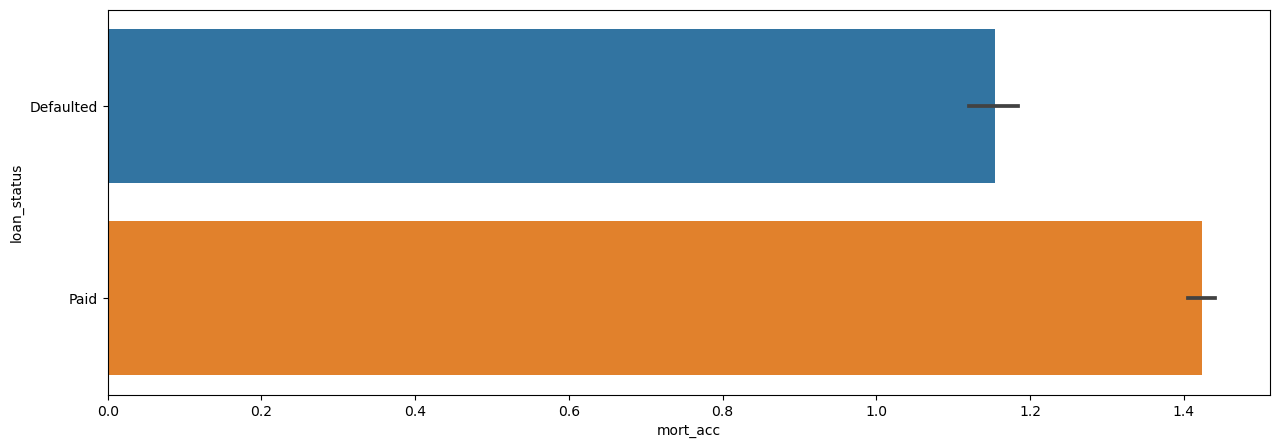

In [33]:
# mort_acc vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="mort_acc",y="loan_status")
plt.show()

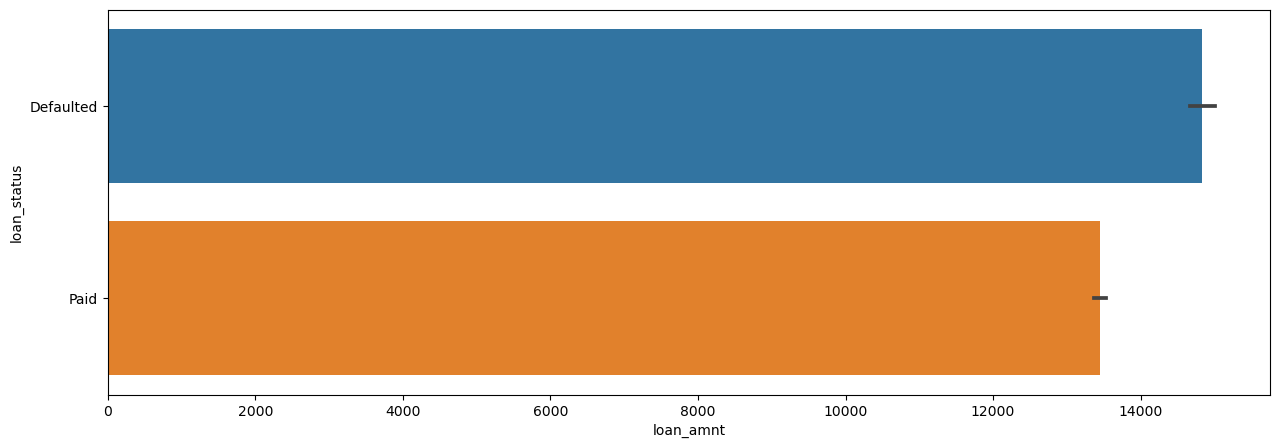

In [34]:
# loan_amnt vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="loan_amnt",y="loan_status")
plt.show()

##### **People whose loan amount is less has paid their loan.**

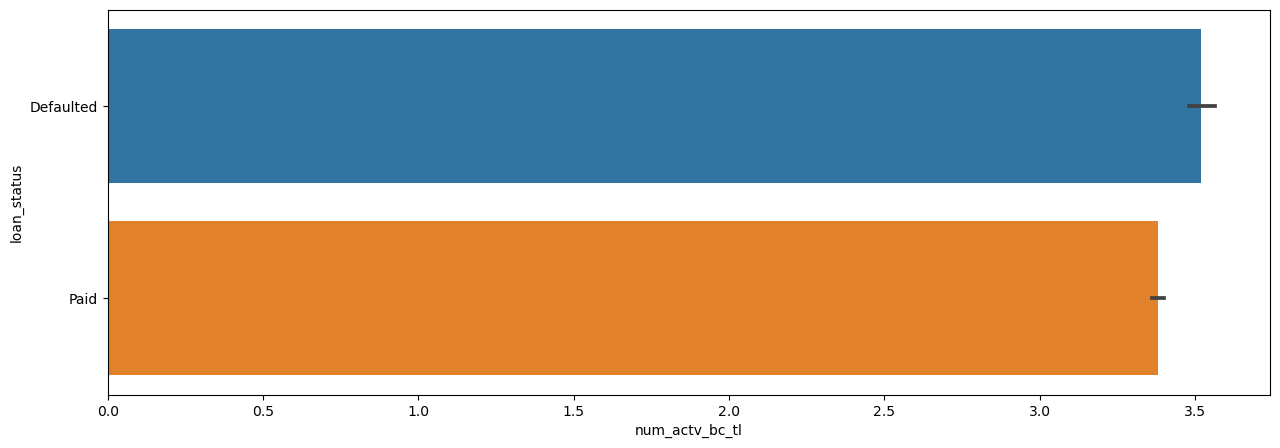

In [35]:
# num_actv_bc_tl vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="num_actv_bc_tl",y="loan_status")
plt.show()

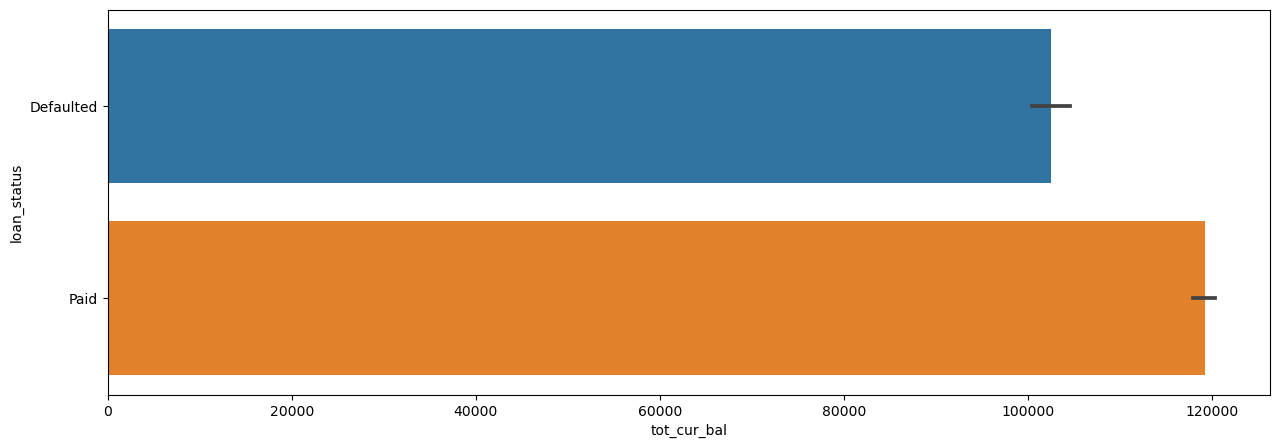

In [36]:
# tot_cur_bal vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="tot_cur_bal",y="loan_status")
plt.show()

##### **People with high current balance have paid their loan.**

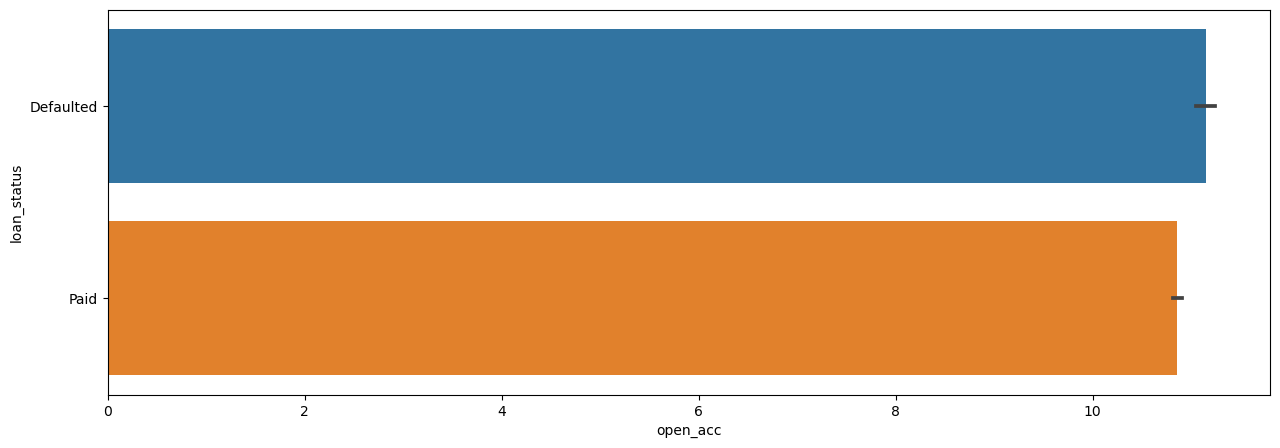

In [37]:
# open_acc vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="open_acc",y="loan_status")
plt.show()

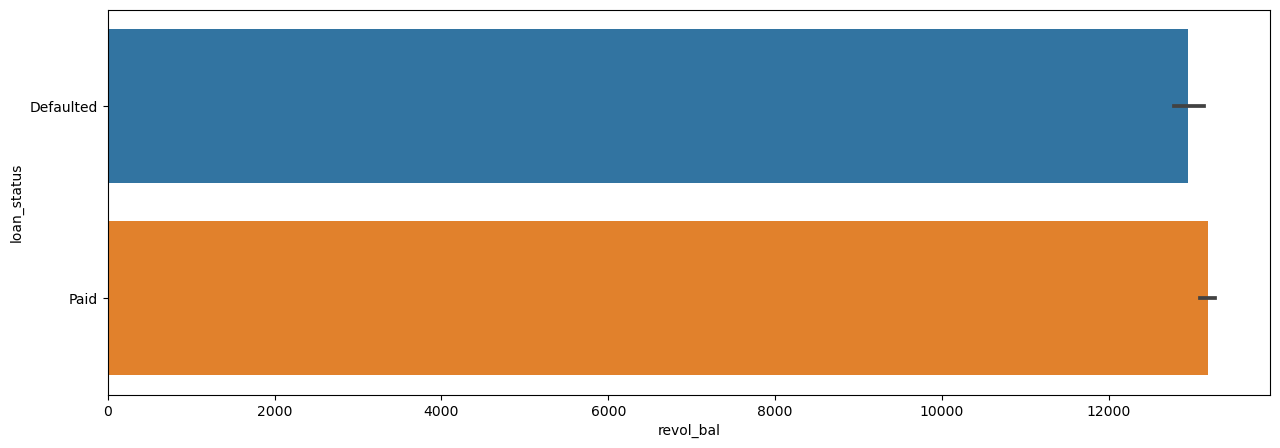

In [38]:
# revol_bal vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="revol_bal",y="loan_status")
plt.show()

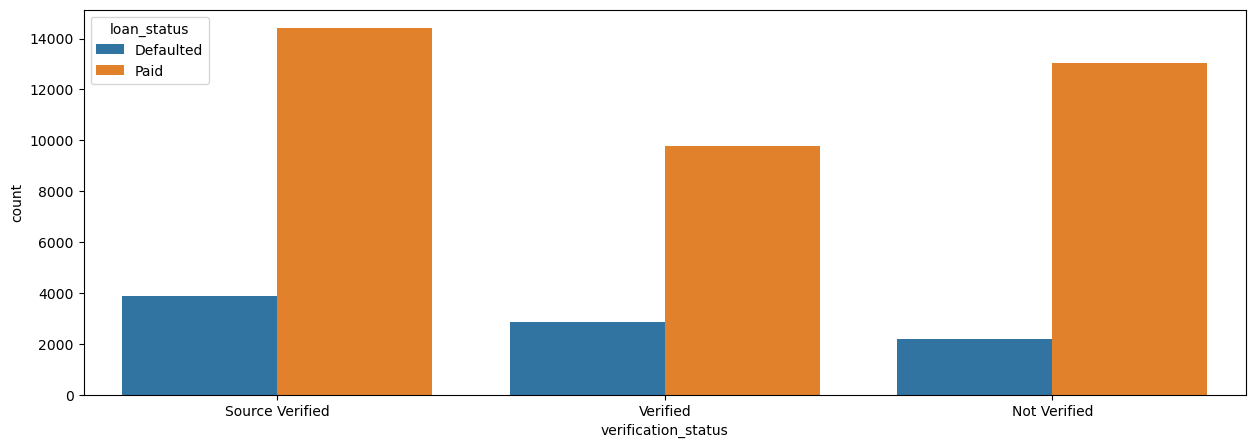

In [39]:
# verification_status count
plt.figure(figsize=(15,5))
sns.countplot(data=df,x="verification_status",hue="loan_status")
plt.show()

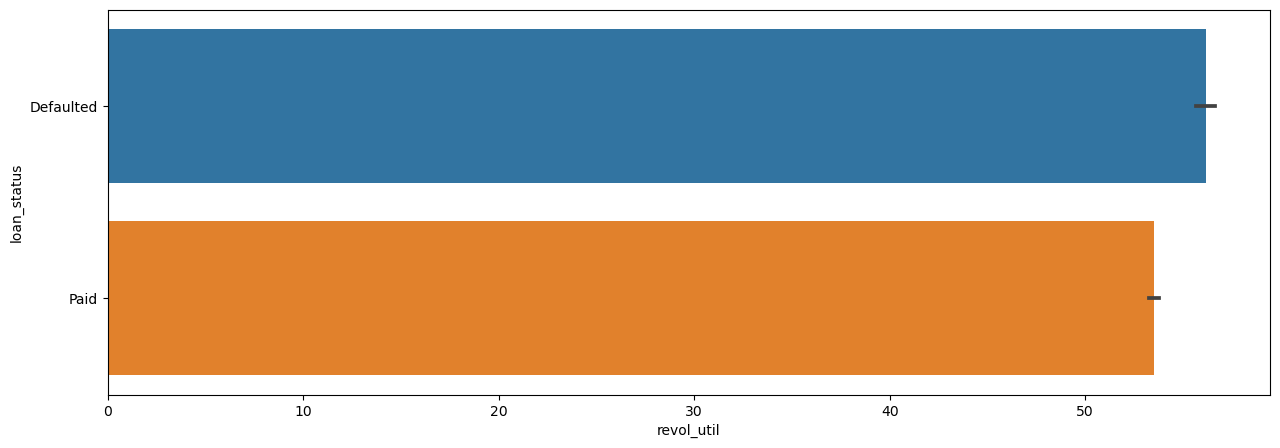

In [40]:
# revol_util vs  loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="revol_util",y="loan_status")
plt.show()

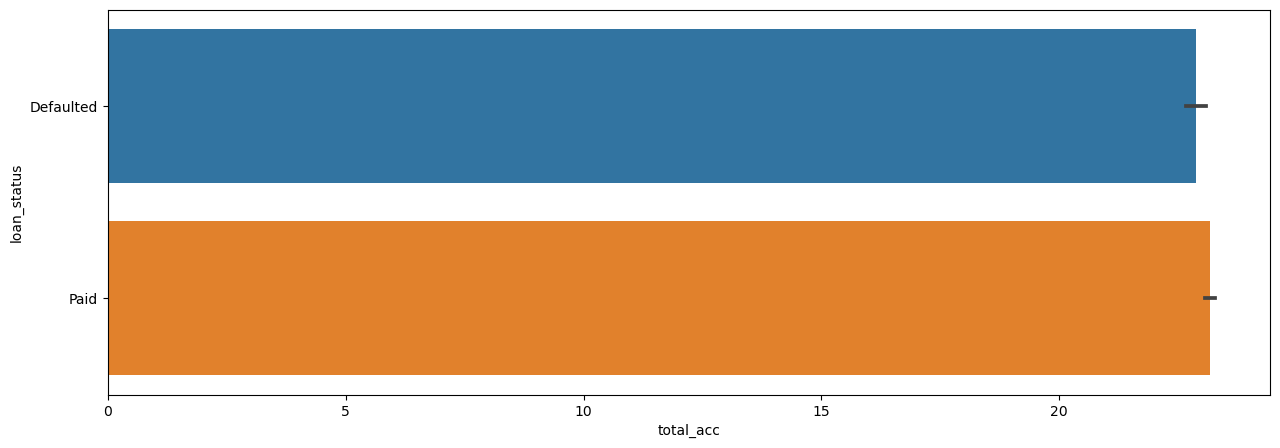

In [41]:
# total_acc vs loan_status
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="total_acc",y="loan_status")
plt.show()

array([[<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'fico_range_high'}>,
        <Axes: title={'center': 'int_rate'}>,
        <Axes: title={'center': 'loan_amnt'}>],
       [<Axes: title={'center': 'num_actv_bc_tl'}>,
        <Axes: title={'center': 'mort_acc'}>,
        <Axes: title={'center': 'tot_cur_bal'}>,
        <Axes: title={'center': 'open_acc'}>],
       [<Axes: title={'center': 'pub_rec'}>,
        <Axes: title={'center': 'pub_rec_bankruptcies'}>,
        <Axes: title={'center': 'revol_bal'}>,
        <Axes: title={'center': 'revol_util'}>],
       [<Axes: title={'center': 'total_acc'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

<Figure size 1500x500 with 0 Axes>

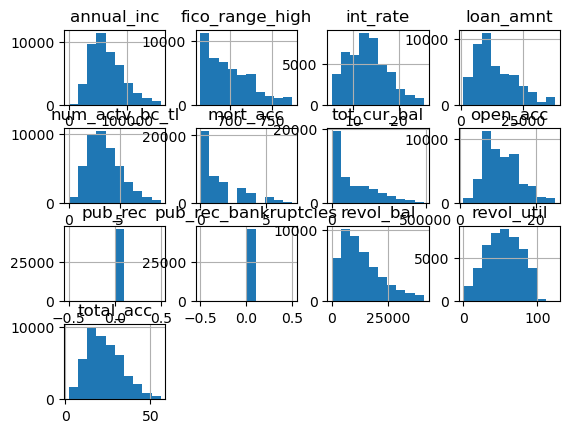

In [42]:
## Histogram for all columns
plt.figure(figsize=(15,5))
df.hist()

## 1.6) Encoding and Feature Scaling

In [43]:
# Separating the numerical and categorical columns
def data_type(df):
    numerical = []
    categorical = []
    for i in df.columns:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(df)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(df)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(df, categorical):
    for i in categorical:
        df[i] = df[i].astype('category')
        df[i] = df[i].cat.codes
    return df

df = encoding(df, categorical)

In [44]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

def features_scale(df,numerical):
    sc_x = StandardScaler()
    df[numerical]= sc_x.fit_transform(df[numerical])
    return df

df = features_scale(df, numerical)

In [45]:
## Dataset after Feature Scaling
df

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,grade,home_ownership,application_type,initial_list_status,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,5,0.658163,289,1,5186,1.726258,4,1,0,1,...,0.0,2,-0.873384,1.676733,20,1,830,-1.453561,1,0
1,4,-0.928036,34,1,5152,0.970741,1,5,0,1,...,0.0,2,0.761599,0.266072,5,0,582,-1.068789,2,1
2,9,-0.223058,54,1,11048,-0.729172,1,1,0,1,...,0.0,2,1.125961,1.460686,9,0,830,-0.684017,1,1
3,13,1.213050,566,1,22717,-1.295810,1,1,0,1,...,0.0,2,0.591563,0.634623,6,0,830,-0.395439,1,1
6,33,1.186896,522,1,14567,0.026345,2,1,0,0,...,0.0,1,2.165763,0.003426,10,0,626,1.239841,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79986,10,-1.104280,399,0,9226,-1.106931,4,5,0,1,...,0.0,2,-0.262980,1.049773,23,1,830,1.239841,0,1
79992,9,-1.492017,35,6,22909,-1.106931,3,5,0,0,...,0.0,1,-0.188204,1.308182,16,0,626,-0.299246,2,1
79994,41,-0.223058,55,10,13370,-0.351414,3,5,0,1,...,0.0,8,-1.124463,-0.746385,17,0,1542,-1.261175,1,1
79996,29,-0.751791,91,1,20140,-0.540293,2,1,0,1,...,0.0,2,-0.783049,0.122041,10,0,830,-0.876403,0,1


In [46]:
df.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'grade', 'home_ownership',
       'application_type', 'initial_list_status', 'int_rate', 'loan_amnt',
       'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec',
       'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [79]:
## Checking for imbalanced data 
df.loan_status.value_counts()

1    37228
0     8908
Name: loan_status, dtype: int64

In [80]:
## Applying SMOTE function
from imblearn.over_sampling import SMOTE
sm = SMOTE (sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm. fit_resample(df.drop('loan_status', axis=1), df['loan_status'])
oversampled = pd. concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)],axis=1)

In [81]:
oversampled

,loan_status,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,0,5,0.658163,289,1,5186,1.726258,4,1,0,...,0,0.0,2,-0.873384,1.676733,20,1,830,-1.453561,1
1,1,4,-0.928036,34,1,5152,0.970741,1,5,0,...,0,0.0,2,0.761599,0.266072,5,0,582,-1.068789,2
2,1,9,-0.223058,54,1,11048,-0.729172,1,1,0,...,0,0.0,2,1.125961,1.460686,9,0,830,-0.684017,1
3,1,13,1.213050,566,1,22717,-1.295810,1,1,0,...,0,0.0,2,0.591563,0.634623,6,0,830,-0.395439,1
4,1,33,1.186896,522,1,14567,0.026345,2,1,0,...,0,0.0,1,2.165763,0.003426,10,0,626,1.239841,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74451,0,28,-0.038916,18,2,15706,-0.050277,0,1,0,...,0,0.0,0,-0.509416,-0.344768,4,0,452,-0.299246,0
74452,0,42,-0.846725,17,6,21304,-0.346779,3,2,0,...,0,0.0,2,-0.393349,1.148791,18,0,830,-0.668084,1
74453,0,35,-0.858344,84,1,12358,0.714713,2,4,0,...,0,0.0,2,1.410126,-0.238307,14,0,830,-0.889303,0
74454,0,4,0.028701,462,5,14533,-0.891164,2,2,0,...,0,0.0,1,0.370428,1.009730,15,0,587,1.542455,2


In [82]:
percent = oversampled['loan_status'].value_counts(normalize= True)*100
percent

0    50.0
1    50.0
Name: loan_status, dtype: float64

In [83]:
df.loan_status.value_counts()

1    37228
0     8908
Name: loan_status, dtype: int64

## 1.7) Splitting data 

In [105]:
## splitting data 
x = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values
y = df.iloc[:,-1].values

In [106]:
## Splitting the dataset into Train and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2, random_state = 42 )

In [107]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (36908, 27)
y_train shape:  (36908,)

Test cases as below
X_test shape:  (9228, 27)
y_test shape:  (9228,)


## 1.8) Machine Learning Algorithum

###### **Logistic Regression**
###### **KNN**
###### **XgBoost**


In [108]:
## Applying logistic regression model on traing dataset
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
## Prediction on test dataset
y_predict = lr.predict(X_test)


In [110]:
## Importing all the necessary functions for checking the accuracy
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, log_loss

In [111]:
from sklearn.metrics import accuracy_score , confusion_matrix
## confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 852,  958],
       [  59, 7359]], dtype=int64)

In [112]:
## checking accuracy on test dataset
score = accuracy_score(y_test, y_predict)
score

0.8897919375812744

In [113]:
## Accuracy of Logistic Regression
#from sklearn import metrics
#accuracyList= []
#modelList=[]


## printing accuracy
#print("Accuracy:", metrics.accuracy_score(y_test, y_predict))
#accuracyList.append(metrics.accuracy_score(y_test, y_predict))
#modelList.append("Logistic Regression")

In [114]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precisionList=[]
recallList=[]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 0.8848142359023686
recall 0.9920463736856295


### **KNN Model**

In [115]:
##  KNN on training dataset
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [116]:
## prediction on test dataset
y_pred_ini = knn_model.predict(X_test)

In [117]:
## Check the accuracy on the testing dataset
score_knn = accuracy_score(y_test,y_pred_ini)
score_knn

0.7766579973992198

In [118]:
## Accuracy of KNN
#from sklearn import metrics
#accuracyList= []
#modelList=[]


## printing accuracy
#print("Accuracy:", metrics.accuracy_score(y_test, y_pred_ini))
#accuracyList.append(metrics.accuracy_score(y_test, y_pred_ini))
#modelList.append("KNeighborsClassifier")

In [119]:
#from sklearn.metrics import accuracy_score , confusion_matrix
# confusion_matrix
cm = confusion_matrix(y_test, y_pred_ini)
cm

array([[ 116, 1694],
       [ 367, 7051]], dtype=int64)

In [120]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precisionList=[]
recallList=[]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 0.8062893081761007
recall 0.9505257481801025


In [121]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,knn_model.predict(X_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.24      0.06      0.10      1810
 Positive(1)       0.81      0.95      0.87      7418

    accuracy                           0.78      9228
   macro avg       0.52      0.51      0.49      9228
weighted avg       0.70      0.78      0.72      9228



## Log Loss

In [122]:
#Using Logloss we are checking the accuracy on the testing dataset
log_loss(y_test,knn_model.predict(X_test))

8.050061728973823

## Comparing the Training and Testing Accuracies

In [123]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_train = knn_model.predict(X_train)

In [124]:
#Checking the accuracy of training dataset 
accuracy_score(y_train,y_pred_train)

0.8241573642570716

In [125]:
#Checking the accuracy of testing dataset
accuracy_score(y_test,y_pred_ini)

0.7766579973992198

#### Conclusion:  **As there is very less difference between the accuracy of training and testing dataset we are good to go with the model.**

## Applying K-Fold Cross Validation to find the best value of K (Tunning)

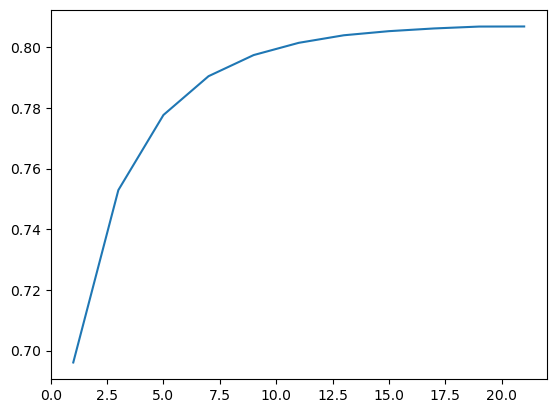

In [126]:
#Using K-fold cross validation technique we will find the best value of K {hyperparameter tunning ?????}
k_value = [1,3,5,7,9,11,13,15,17,19,21]
from sklearn.model_selection import cross_val_score
cv_score = []

for k in k_value:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train,y_train,cv=3, scoring='accuracy')
    cv_score.append(scores.mean())
    
cv_score
plt.plot(k_value, cv_score)
plt.show()
#The best value of K is coming out to be 11, we will retrain the model with the value of K as 11

In [127]:
#Applying the K-Nearest Neighbour on the training dataset
from sklearn.neighbors import KNeighborsClassifier
knn_model_tuned = KNeighborsClassifier(n_neighbors=7)
knn_model_tuned.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [128]:
#Running the model on the test dataset
y_pred_tuned = knn_model_tuned.predict(X_test)

In [129]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_tuned)

0.7863025574338969

## Applying XGBoost Algorithum


In [130]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [131]:
#xgboost algorithum
import xgboost as xgb

In [132]:
# create an XG Boost classifier
xg_class = xgb.XGBClassifier( n_estimators = 10)
xg_class

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [133]:
# Fit and predict from the model
xg_class.fit(X_train,y_train)

preds = xg_class.predict(X_test)

In [135]:
accuracyList=[]
modelList=[]

In [136]:
from sklearn import metrics
# Finding the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, preds))
accuracyList.append(metrics.accuracy_score(y_test, preds))
modelList.append("XGBoost")

Accuracy: 1.0


In [137]:
#from sklearn.metrics import accuracy_score , confusion_matrix
# confusion_matrix
cm = confusion_matrix(y_test, preds)
cm

array([[1810,    0],
       [   0, 7418]], dtype=int64)

In [138]:
## Accuracy of XG Boost
##from sklearn import metrics
##accuracyList= []
##modelList=[]


## printing accuracy
##print("Accuracy:", metrics.accuracy_score(y_test, preds))
##accuracyList.append(metrics.accuracy_score(y_test, preds))
##modelList.append("XGBClassifier")

In [139]:
# lets get the precision and recall numbers using confusion matrix itself
CM=cm
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precisionList=[]
recallList=[]

print("precision",TP/(TP+FP))
print("recall", TP/(TP+FN))
precisionList.append(TP/(TP+FP))
recallList.append(TP/(TP+FN))

precision 1.0
recall 1.0


## **Conclusion :- We conclude that all models gives almost same Accuracy, Recall and Precision but xgboost gives the highest accuracy.**